In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
references_df = pd.read_csv('references.csv')
references_df.index += 1

In [ ]:
df_col_name_list = list(references_df.columns)

In [ ]:
cult_refs_count_cols = ['Cultural references', 'Cultural References', 'Trivia/Cultural References', 'Cultural Reference', 'Notes and references', 'Beatles references', 'References to Toy Story in Condiments', 'Culture References']
self_refs_count_cols = ['Previous Episode References', 'Previous and Future Episode References', 'Previous episode references', 'References to other episodes', 'In-show references', 'Previous Episodes References', 'Call-Backs', 'Call-Backs to previous episodes', 'Call-Backs to Episodes (In order of appearance in the episode)']
goofs_count_cols = ['Goofs', 'Trivia/Goofs', 'Goofs/Trivia', 'Goofs and Continuity Errors', 'Pants Goof', 'Goofs/errors', 'Goof', "Goofs'"]
errors_count_cols = ['Errors', 'Continuity Errors', 'Factual Errors', 'Goofs and Continuity Errors', 'Goofs/errors']

In [ ]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

def select_columns(data, columns):
    return data.reindex(columns = columns)

def add_column_from_existing(data, new_column_name, columns_names):
    data[new_column_name] = pd.Series(dtype=float)
    for cnt, name in enumerate(columns_names):
        if cnt == 0:
            data[new_column_name] = data.loc[:,name].fillna(value=0)
        else:
            data[new_column_name] += data.loc[:,name].fillna(value=0)
    return data

In [ ]:
new_cols_names = ['cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count']
feature_counts = (
    references_df
    .pipe(add_column_from_existing, new_cols_names[0], cult_refs_count_cols)
    .pipe(add_column_from_existing, new_cols_names[1], self_refs_count_cols)
    .pipe(add_column_from_existing, new_cols_names[2], goofs_count_cols)
    .pipe(add_column_from_existing, new_cols_names[3], errors_count_cols)
    .pipe(select_columns, new_cols_names)
)

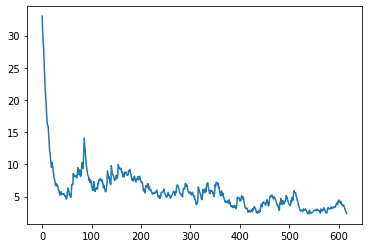

In [59]:
y = smooth(list(feature_counts['goofs_count']), 0.9)
plt.plot(y)

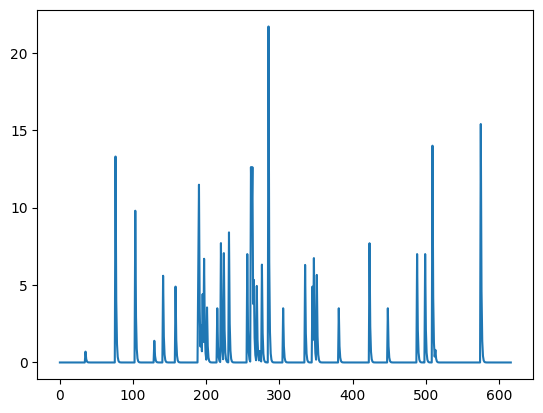

In [31]:
y = smooth(list(feature_counts['self_refs_count']), 0.3)
plt.plot(y)